In [141]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [29]:
df = pd.read_csv("Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


<h5>Exploratory Data Analysis</h5>

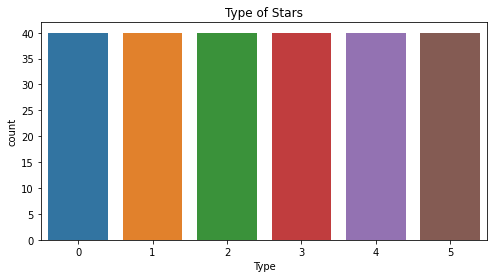

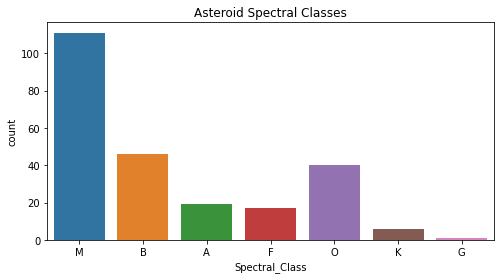

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Type"])
plt.title("Type of Stars")

plt.figure(figsize=(8,4))
sns.countplot(x=df["Spectral_Class"])
plt.title("Asteroid Spectral Classes");

In [31]:
px.pie(data_frame=df, names="Color", title="Percentage of Star Colors in the Dataset")

In [32]:
print(df.info())
print("\n")
print(f"Number of NaN values:\n{df.isna().sum()}")
print("\n")
print(f"Number of Duplicated Rows:\n{df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB
None


Number of NaN values:
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


Number of Duplicated Rows:
0


<h6>Preprocess the Data</h6>

In [44]:
df["Color"] = df["Color"].replace({
    "Yellowish White": "yellow-white",
    "Yellowish": "Yellow",
    "yellowish": "Yellow",
    "Pale yellow orange": "Yellow-orange",
    "Blue White": "Blue-white",
    "Blue white": "Blue-white",
    "Blue-White": "Blue-white",
    "white": "White",
    "Whitish": "White"
})

In [45]:
df = pd.get_dummies(data=df, columns=["Color", "Spectral_Class"], drop_first=True)
df.head()

,Temperature,L,R,A_M,Type,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-orange,Color_yellow-white,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [111]:
# Split the data to training and test sets 
X = df.drop("Type", axis=1)
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [112]:
# Scale the Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h6>Build Neural Network</h6> 

In [136]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

callback_list = [EarlyStopping(
    monitor='val_loss',
    min_delta=0.05,
    patience=50,
    mode='min',
    restore_best_weights=True,
)]

In [137]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(X_train, y_train, 
          batch_size=30, 
          epochs=500, 
           callbacks=callback_list,
          validation_data=(X_test, y_test))

Epoch 1/500
6/6 [==============================] - 0s 30ms/step - loss: 2.1269 - accuracy: 0.1310 - val_loss: 2.1511 - val_accuracy: 0.1528
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 2.2189 - accuracy: 0.1190 - val_loss: 2.0909 - val_accuracy: 0.1667
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 2.1010 - accuracy: 0.2500 - val_loss: 2.0312 - val_accuracy: 0.1806
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.9792 - accuracy: 0.1607 - val_loss: 1.9781 - val_accuracy: 0.1806
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 1.9001 - accuracy: 0.2381 - val_loss: 1.9268 - val_accuracy: 0.1806
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.9238 - accuracy: 0.2679 - val_loss: 1.8766 - val_accuracy: 0.3194
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 1.8989 - accuracy: 0.2381 - val_loss: 1.8265 - val_accuracy: 0.3611
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.7144 - accuracy: 0.7321 - val_loss: 0.6640 - val_accuracy: 0.8056
Epoch 60/500
6/6 [==============================] - 0s 5ms/step - loss: 0.7293 - accuracy: 0.7381 - val_loss: 0.6549 - val_accuracy: 0.8056
Epoch 61/500
6/6 [==============================] - 0s 5ms/step - loss: 0.8111 - accuracy: 0.7024 - val_loss: 0.6466 - val_accuracy: 0.8056
Epoch 62/500
6/6 [==============================] - 0s 5ms/step - loss: 0.7352 - accuracy: 0.7560 - val_loss: 0.6391 - val_accuracy: 0.8056
Epoch 63/500
6/6 [==============================] - 0s 5ms/step - loss: 0.7821 - accuracy: 0.7143 - val_loss: 0.6321 - val_accuracy: 0.8194
Epoch 64/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6964 - accuracy: 0.7679 - val_loss: 0.6255 - val_accuracy: 0.8472
Epoch 65/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7402 - accuracy: 0.7024 - val_loss: 0.6176 - val_accuracy: 0.8472
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.9048 - val_loss: 0.3860 - val_accuracy: 0.9444
Epoch 118/500
6/6 [==============================] - 0s 7ms/step - loss: 0.5762 - accuracy: 0.7857 - val_loss: 0.3836 - val_accuracy: 0.9444
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4179 - accuracy: 0.8869 - val_loss: 0.3820 - val_accuracy: 0.9444
Epoch 120/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4594 - accuracy: 0.8512 - val_loss: 0.3804 - val_accuracy: 0.9444
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4730 - accuracy: 0.8690 - val_loss: 0.3771 - val_accuracy: 0.9444
Epoch 122/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.8512 - val_loss: 0.3736 - val_accuracy: 0.9444
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4695 - accuracy: 0.8452 - val_loss: 0.3711 - val_accuracy: 0.9444
Epoch 124/500
6/6 [========

Epoch 175/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.8571 - val_loss: 0.2891 - val_accuracy: 0.9583
Epoch 176/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3520 - accuracy: 0.9107 - val_loss: 0.2880 - val_accuracy: 0.9583
Epoch 177/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.9107 - val_loss: 0.2872 - val_accuracy: 0.9722
Epoch 178/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.9048 - val_loss: 0.2860 - val_accuracy: 0.9722
Epoch 179/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.9107 - val_loss: 0.2844 - val_accuracy: 0.9583
Epoch 180/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.9107 - val_loss: 0.2821 - val_accuracy: 0.9583
Epoch 181/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8929 - val_loss: 0.2807 - val_accuracy: 0.9583
Epoch 182/500

<AxesSubplot:>

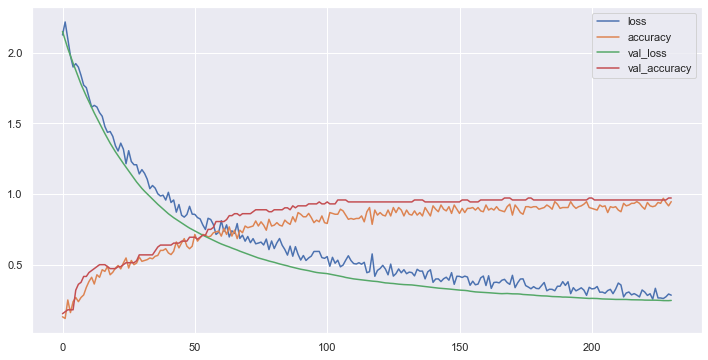

In [138]:
sns.set_theme()
results = pd.DataFrame(model.history.history)
results.plot(figsize=(12,6))

In [142]:
predictions = np.argmax(model.predict(X_test), axis=-1)

print(pd.DataFrame(confusion_matrix(y_test, predictions)))
print("\n")
print(classification_report(y_test, predictions))

    0  1   2   3  4   5
0  13  0   0   0  0   0
1   1  7   0   0  0   0
2   0  0  12   0  0   0
3   0  0   2  15  0   0
4   0  0   0   0  7   0
5   0  0   0   0  0  15


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.88      0.93         8
           2       0.86      1.00      0.92        12
           3       1.00      0.88      0.94        17
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        15

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72

